# **Introduction:**

In this project we have developed a Neural Network model for predicting House Sale Prices in Python
The steps we followed:
1. Data visualization and exploration
2. Data transformation and feature engineering
3. Training and validation process
4. Model evaluation

# **1. Data Visulaization and Exploration step**
   Here we try see what kind of data we have with us and visulaize it to understand it's patterns and check if we can apply transformation for training and validation process.
   Dataset URL: https://www.kaggle.com/datasets/lespin/house-prices-dataset?resource=download

   From the URL we have train dataset----train.csv  
                        test dataset-----test.csv (without the target variable)

In [1]:
# To ignore any warnings
import warnings
warnings.filterwarnings('ignore')

# To visualize my data and any other analysis
import matplotlib.pyplot as plt

# For Data accessing and manipulation
import pandas as pd
import numpy as np

In [2]:
# Load ing the data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [3]:
# Showing the first 5 rows of train dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Showing the first 5 rows of test dataset
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Analyse the statistics of target variable in trainng data
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

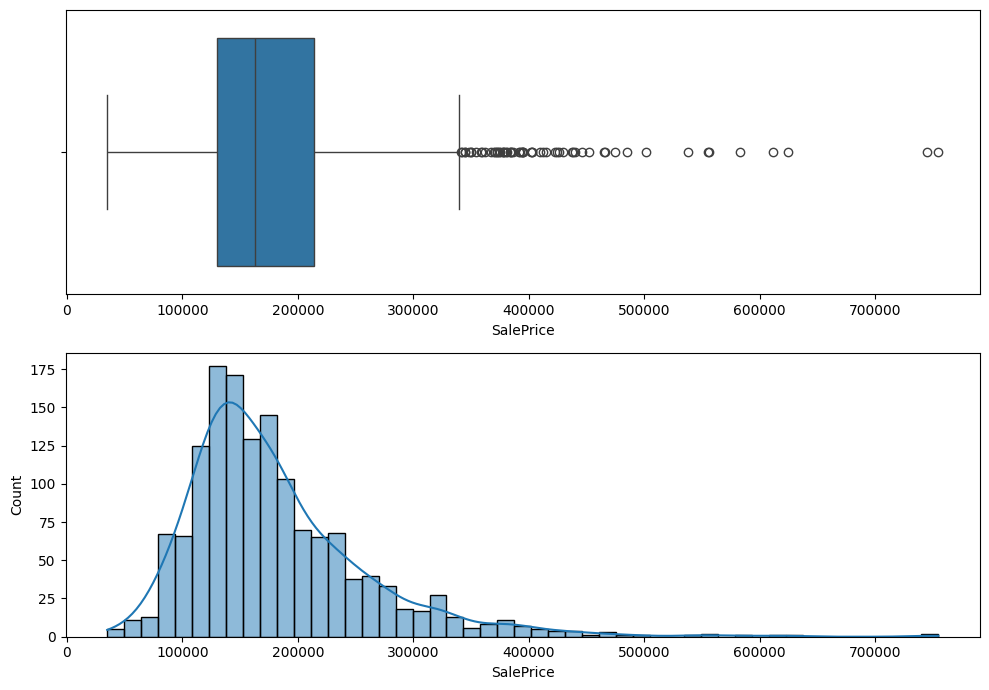

In [6]:
import seaborn as sns

# Visualizing house prices
figure1 = plt.figure(figsize=(10,7))
figure1.add_subplot(2,1,1)
sns.boxplot(x=train_data['SalePrice'])
figure1.add_subplot(2,1,2)
sns.histplot(train_data['SalePrice'], kde=True)
plt.tight_layout()
plt.show()


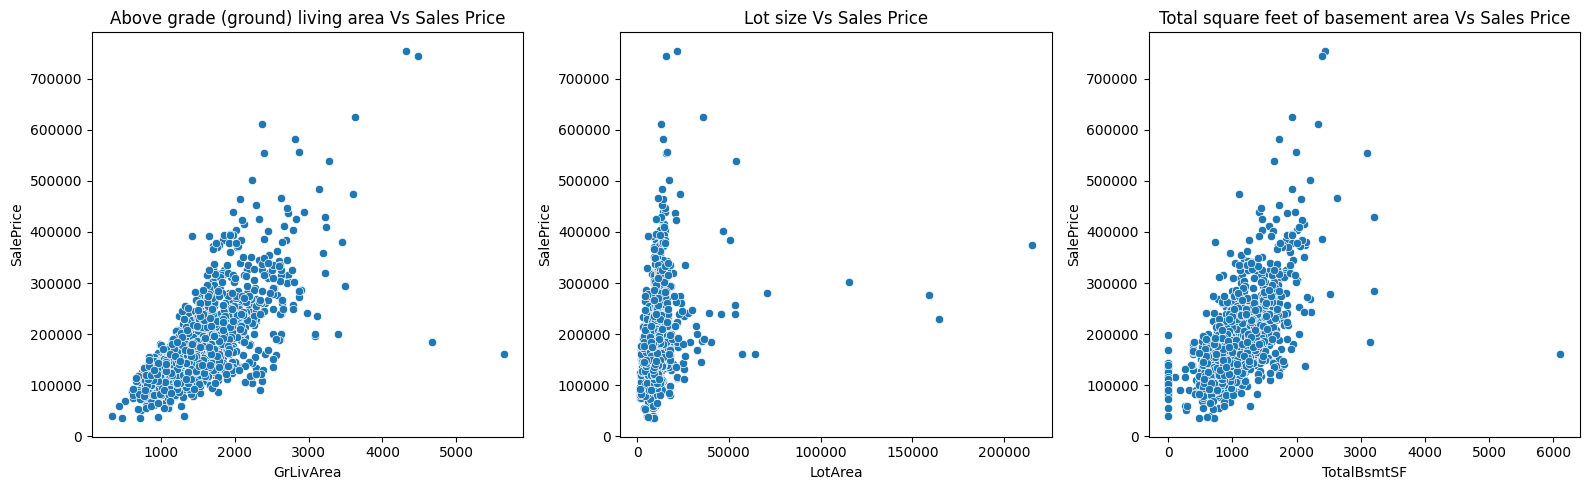

In [7]:
# Visualizing some statistics
figure2 = plt.figure(figsize=(16,5))
figure2.add_subplot(1,3,1)
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('Above grade (ground) living area Vs Sales Price')

figure2.add_subplot(1,3,2)
sns.scatterplot(x=train_data['LotArea'], y=train_data['SalePrice'])
plt.title('Lot size Vs Sales Price')

figure2.add_subplot(1,3,3)
sns.scatterplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'])
plt.title('Total square feet of basement area Vs Sales Price')

plt.tight_layout()
plt.show()


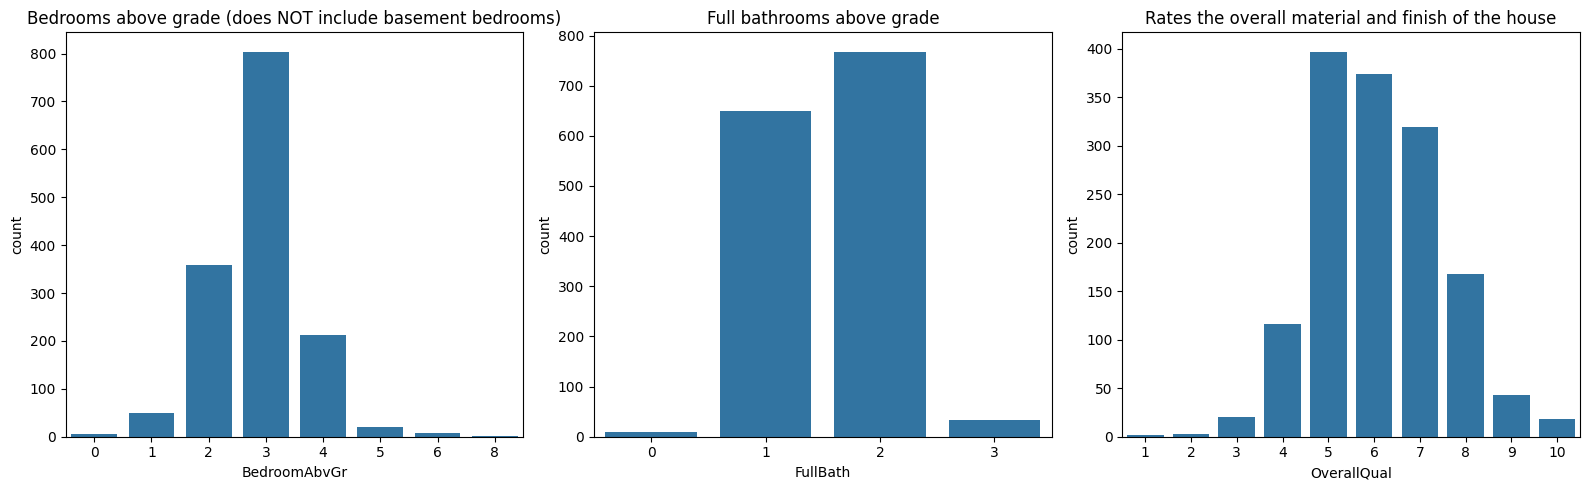

In [8]:
# Visualizing some more features
figure3 = plt.figure(figsize=(16,5))
figure3.add_subplot(1,3,1)
sns.countplot(x=train_data['BedroomAbvGr'])
plt.title('Bedrooms above grade (does NOT include basement bedrooms)')

figure3.add_subplot(1,3,2)
sns.countplot(x=train_data['FullBath'])
plt.title('Full bathrooms above grade')

figure3.add_subplot(1,3,3)
sns.countplot(x=train_data['OverallQual'])
plt.title('Rates the overall material and finish of the house')

plt.tight_layout()
plt.show()


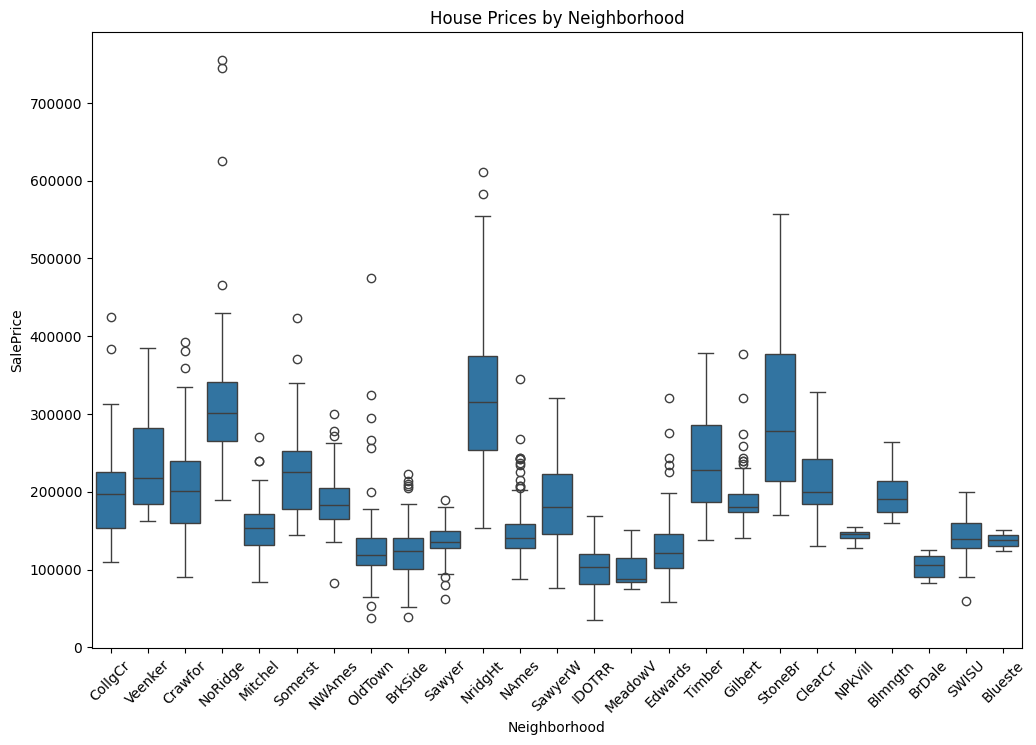

In [9]:
# Creating a box plot to show SalePrice distribution for each neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('House Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()


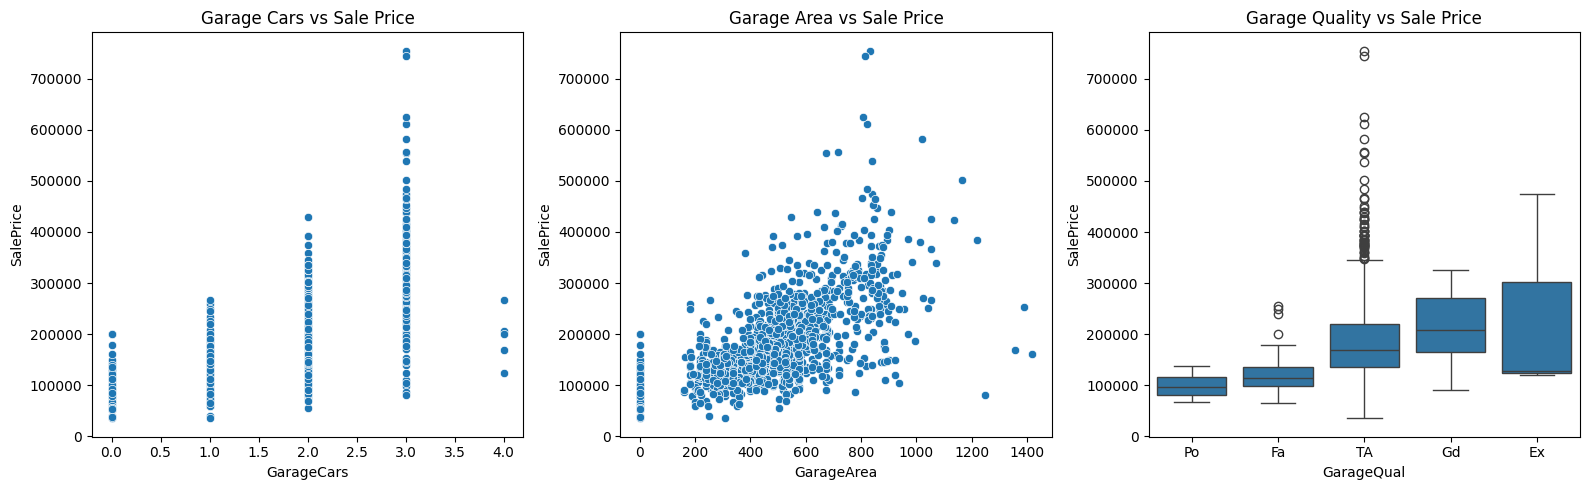

In [10]:
# Scatter plots for garage fetaures
figure4 = plt.figure(figsize=(16,5))
figure4.add_subplot(1, 3, 1)
sns.scatterplot(x=train_data['GarageCars'], y=train_data['SalePrice'])
plt.title('Garage Cars vs Sale Price')

figure4.add_subplot(1, 3, 2)
sns.scatterplot(x=train_data['GarageArea'], y=train_data['SalePrice'])
plt.title('Garage Area vs Sale Price')

# Since GarageQual is a categorical variable, we used a boxplot to show the relationship
# Ex	Excellent, Gd	Good, TA	Typical/Average, Fa	Fair, Po	Poor, NA	No Garage (Ex > Gd > TA > Fa > Po)
garage_qual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
train_data['GarageQual'] = pd.Categorical(train_data['GarageQual'], categories=garage_qual, ordered=True)

figure4.add_subplot(1, 3, 3)
sns.boxplot(x=train_data['GarageQual'], y=train_data['SalePrice'])
plt.title('Garage Quality vs Sale Price')

plt.tight_layout()
plt.show()


Checking for any missing values

In [11]:
# We have NA for missing values
columns_with_na = train_data.isna().sum()
# taking the descending order because ascending order will have values with 0 NA values as the first cell
column_na = pd.DataFrame({'Column': columns_with_na.index, 'Count': columns_with_na.values}).sort_values(by='Count', ascending=False)
print(column_na.head(20))

          Column  Count
72        PoolQC   1453
74   MiscFeature   1406
6          Alley   1369
73         Fence   1179
25    MasVnrType    872
57   FireplaceQu    690
3    LotFrontage    259
59   GarageYrBlt     81
64    GarageCond     81
58    GarageType     81
60  GarageFinish     81
63    GarageQual     81
35  BsmtFinType2     38
32  BsmtExposure     38
30      BsmtQual     37
31      BsmtCond     37
33  BsmtFinType1     37
26    MasVnrArea      8
42    Electrical      1
0             Id      0


# **2. Data transformation and feature engineering**

Here we perfrom needed transformations on the data to make it suitable for the training process for the model built

In [12]:

# Dropping unncessary features with too many missing values and are not valuable for analysis
features_to_drop1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Street', 'Utilities', 'Condition2', 'RoofMatl',
                    'Heating', 'LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']
train_data.drop(features_to_drop1, axis=1, inplace=True)
test_data.drop(features_to_drop1, axis=1, inplace=True)

# As garage details can be helpful, we filled missing values for 'Garage' related features
garage_numeric_features = ['GarageArea', 'GarageCars', 'GarageYrBlt']
garage_categorical_features = ['GarageQual']

for feature in garage_numeric_features:
    train_data[feature].fillna(0, inplace=True)
    test_data[feature].fillna(0, inplace=True)

for feature in garage_categorical_features:
    # Adding 'None' as a category if it doesn't exist to avoid any discrepancy
    train_data[feature] = train_data[feature].astype('category')
    if 'None' not in train_data[feature].cat.categories:
        train_data[feature] = train_data[feature].cat.add_categories('None')
    train_data[feature].fillna('None', inplace=True)

    test_data[feature] = test_data[feature].astype('category')
    if 'None' not in test_data[feature].cat.categories:
        test_data[feature] = test_data[feature].cat.add_categories('None')
    test_data[feature].fillna('None', inplace=True)

# Feature Engineering: Creating new features
train_data['AgeOfHouse'] = train_data['YrSold'] - train_data['YearBuilt']
# Multiplied with 0.5 for Half Bathrooms
train_data['TotalBath'] = train_data['FullBath'] + 0.5 * train_data['HalfBath'] + train_data['BsmtFullBath'] + 0.5 * train_data['BsmtHalfBath']
train_data['TotalSF'] = train_data['GrLivArea'] + train_data['TotalBsmtSF'] # Above grade living area and total basement area

# Similar feature engineering for test data
test_data['AgeOfHouse'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['TotalBath'] = test_data['FullBath'] + 0.5 * test_data['HalfBath'] + test_data['BsmtFullBath'] + 0.5 * test_data['BsmtHalfBath']
test_data['TotalSF'] = test_data['GrLivArea'] + test_data['TotalBsmtSF']

# Handle Neighborhood feature
neighborhood_pricing = train_data.groupby('Neighborhood')['SalePrice'].mean().sort_values()
bins = [0, neighborhood_pricing.quantile(0.33), neighborhood_pricing.quantile(0.66), neighborhood_pricing.max()]
labels = ['Low', 'Medium', 'High']
price_bins = pd.cut(neighborhood_pricing, bins=bins, labels=labels, include_lowest=True)
neighborhood_to_price_bin = price_bins.to_dict()
train_data['NeighborhoodBin'] = train_data['Neighborhood'].map(neighborhood_to_price_bin)
test_data['NeighborhoodBin'] = test_data['Neighborhood'].map(neighborhood_to_price_bin)

# Dropping the features after fetaure engineering
features_to_drop2 = ['YrSold', 'YearBuilt', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'GrLivArea', 'TotalBsmtSF', 'Neighborhood']
train_data.drop(features_to_drop2, axis=1, inplace=True)
test_data.drop(features_to_drop2, axis=1, inplace=True)

# Handling the remaining missing values
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)

train_data['MasVnrArea'].fillna(0, inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)

# Ensure 'None' is added to other categorical variables if necessary and fill NA
categorical_features = train_data.select_dtypes(include=['category', 'object']).columns
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype('category')
    test_data[feature] = test_data[feature].astype('category')
    if 'None' not in train_data[feature].cat.categories:
        train_data[feature] = train_data[feature].cat.add_categories('None')
    train_data[feature].fillna('None', inplace=True)
    if 'None' not in test_data[feature].cat.categories:
        test_data[feature] = test_data[feature].cat.add_categories('None')
    test_data[feature].fillna('None', inplace=True)

# Handle categorical variables using one hot encoding
train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Aligning the columns across train and test dataset
final_columns = [col for col in train_data.columns if col in test_data.columns] + \
                [col for col in train_data.columns if col not in test_data.columns]
test_data = test_data.reindex(columns=final_columns, fill_value=0)


In [13]:
# Print data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 212 entries, Id to NeighborhoodBin_None
dtypes: bool(185), float64(4), int64(23)
memory usage: 571.9 KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 212 entries, Id to GarageQual_Ex
dtypes: bool(178), float64(10), int64(24)
memory usage: 641.3 KB


# **3. Training and validation process**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation

# In both datasets we are ignoring the ID
# Separating the features into X and target variable into y
X = train_data.drop(['SalePrice', 'Id'], axis=1)
y = train_data['SalePrice']

# Drop 'SalePrice' column from test_data
X_test = test_data.drop(['SalePrice', 'Id'], axis=1)

# Using and Splitting the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data helps in scaling all the features to same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ensuring whether the test data columns are same as train data before scaling it
X_test = X_test[X_train.columns]
X_test_scaled = scaler.transform(X_test)

# neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training the model
trained_data = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))



Epoch 1/100
37/37 [==============================] - 2s 10ms/step - loss: 38884184064.0000 - mean_absolute_error: 181438.0000 - val_loss: 39648800768.0000 - val_mean_absolute_error: 178826.9375
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 38858649600.0000 - mean_absolute_error: 181380.0625 - val_loss: 39576117248.0000 - val_mean_absolute_error: 178668.0312
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 38643662848.0000 - mean_absolute_error: 180901.1250 - val_loss: 39075491840.0000 - val_mean_absolute_error: 177599.8281
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 37614751744.0000 - mean_absolute_error: 178606.4375 - val_loss: 37150244864.0000 - val_mean_absolute_error: 173424.1250
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 34396131328.0000 - mean_absolute_error: 171275.7812 - val_loss: 32111214592.0000 - val_mean_absolute_error: 161855.2031
Epoch 6/100
37/37 [===============

# **4. Model evaluation**

In [16]:
# Evaluate the model
val_loss, val_mae = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Validation Mean Absolute Error: {val_mae}")

# Predict on test data
test_predictions = model.predict(X_test_scaled)

Validation Mean Absolute Error: 24051.875
46/46 [==============================] - 0s 2ms/step


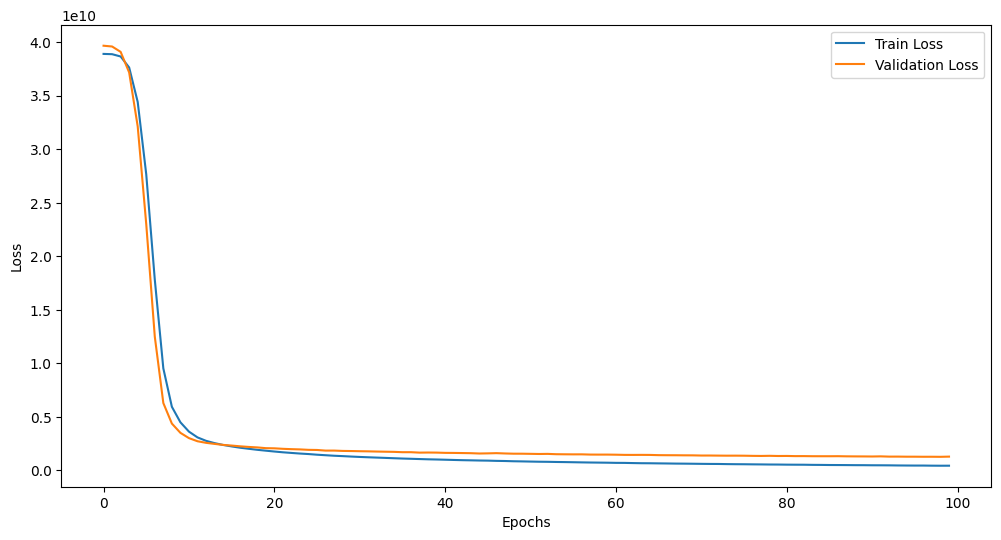

In [17]:
# Plot the trained history
plt.figure(figsize=(12, 6))
plt.plot(trained_data.history['loss'], label='Train Loss')
plt.plot(trained_data.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Show some test predictions
print("Test Predictions: ", test_predictions[:5])

Test Predictions:  [[116160.36]
 [149515.1 ]
 [167734.53]
 [175741.78]
 [180710.66]]


10/10 [==============================] - 0s 2ms/step


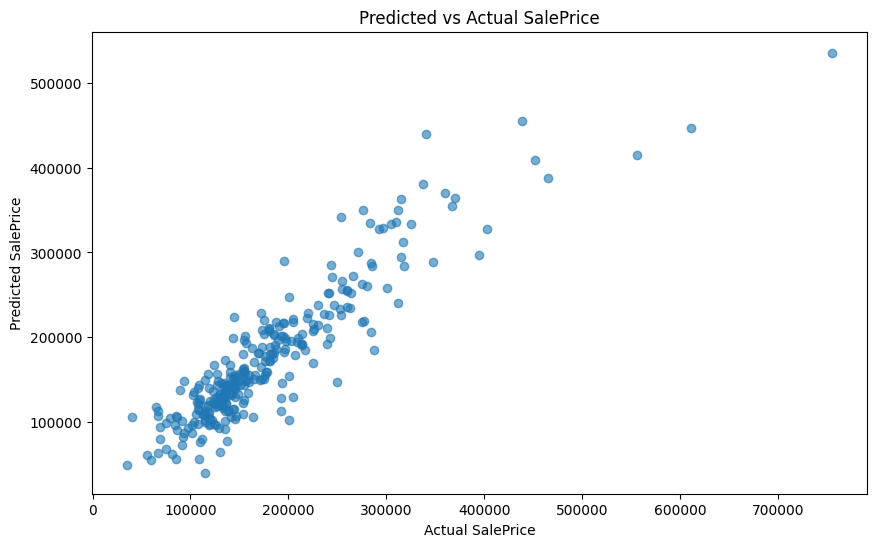

In [19]:
y_val_pred = model.predict(X_val_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice")
plt.show()


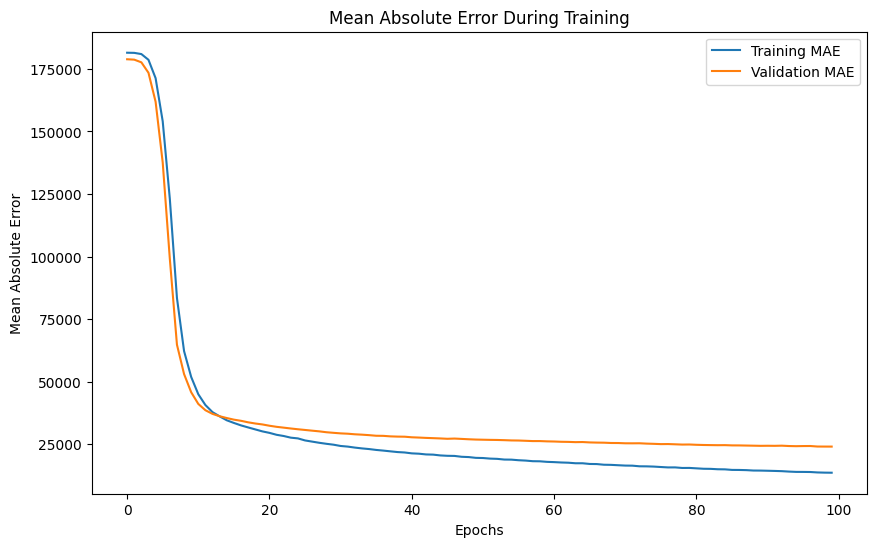

In [20]:

# Mean Absolute Error Distribution
train_mae = trained_data.history['mean_absolute_error']
val_mae = trained_data.history['val_mean_absolute_error']
plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error During Training')
plt.legend()
plt.show()

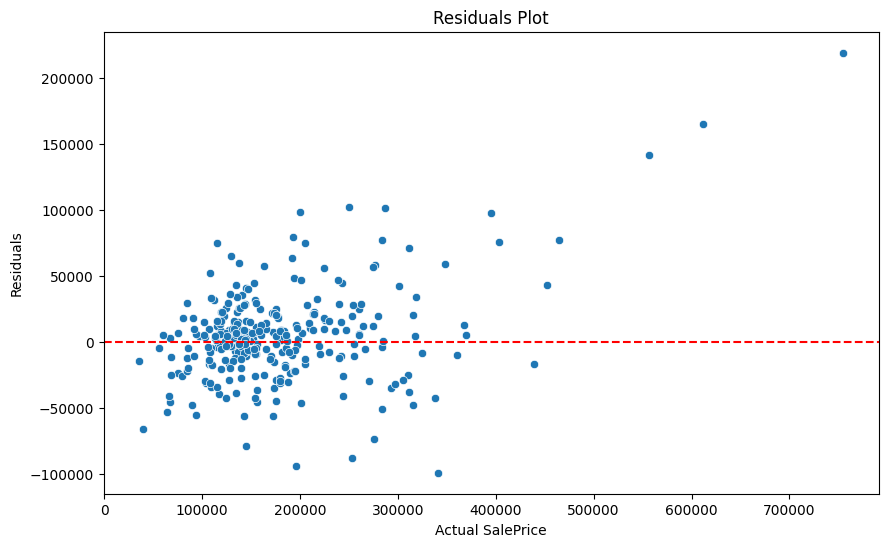

In [21]:

# Residuals Plot
residuals = y_val - y_val_pred.flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=residuals)
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()


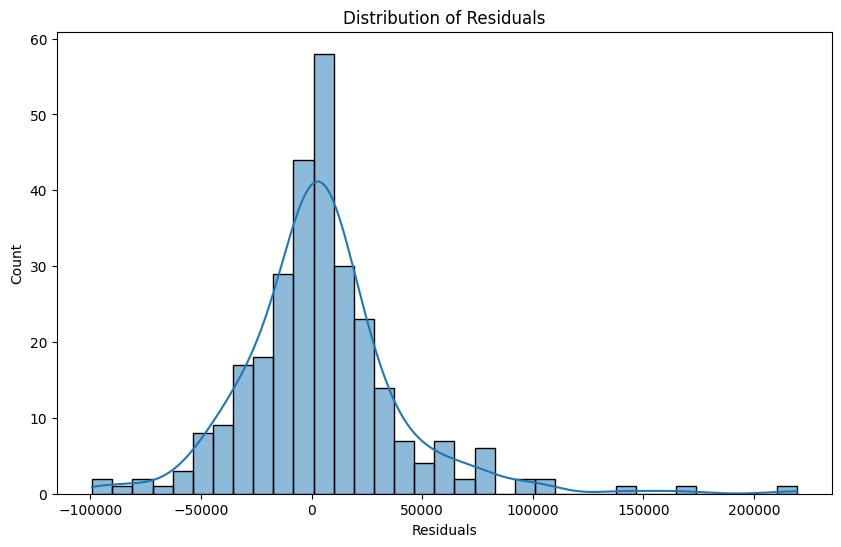

In [22]:

# Distribution of Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

